# Term Portfolio Project {-}

Evan Strasdin  
University of Victoria  
SENG-265, Winter 2023-24  


____

## Table of Contents {-}
1. [Introduction: Jupyter Magics, Creating a Table of Contents](#introduction-jupyter-magics-creating-a-table-of-contents) (Week 1)
   - [About notebooks, magics](#about-notebooks-magics)
   - [Creating a custom magic](#creating-a-custom-magic)
   - [Creating a table of contents](#creating-a-table-of-contents)
2. [Bash](#bash) (Weeks 2-4)
   - [`man` and '--help`](#the-most-useful-command-line-tools-man-and---help)
   - [Shell scripting](#shell-scripting)
   - [Aliases](#aliases)
3. [C](#c) (Weeks 3-5)
   - [C and bash](#c-and-bash)
   - [Pointers](#pointers)
   - [C libraries](#c-libraries)
4. [Python](#python) (Week 6 onwards)
   - [Python and Bash](#python-and-bash)
   - [Type Annotations and Docstrings](#python-type-annotations-and-docstrings)
   - [Some Important Libraries](#some-important-libraries)
5. [Answers to Selected Questions](#answers-to-selected-questions)
6. [Citations and References](#citations-and-references)

____

## Introduction: Jupyter Magics, Creating a Table of Contents {-}

### About notebooks, magics {-}

I've included the section on magics and markdown tables of contents since, if you're like me, you love the idea of a single file which can be navigated like a wiki, can support both markdown and usable code in just about any language and can be exported directly to html for publishing online.

Magics are special commands that provide additional functionality within Jupyter notebooks. If you can't figure out how to do something specific with your notebook, there's a good chance you can do it with a magic.

I have a good amount of experience using Jupyter notebooks but little experience using magics (or python scripts for that matter), so I've decided to see if the all-knowing chatGPT could help me out. My goal for now is to add support for C and Python cells in the same notebook, and to create a working table of contents to make this file navigable.

### Creating a custom magic {-}

#### 1. Create a Python module for your magic command {-}

This chatGPT code defines the behavior of the custom magic:

In [6]:
# Module contents for C language support

from IPython.core.magic import Magics, magics_class, cell_magic
from IPython import get_ipython
import subprocess

@magics_class
class CMagic(Magics):
    @cell_magic
    def c(self, line, cell):
        # Save the C code to a temporary file
        with open('temp.c', 'w') as f:
            f.write(cell)

        # Compile the C code
        compile_command = f'gcc -o temp_executable temp.c'
        compile_result = subprocess.run(compile_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

        if compile_result.returncode == 0:
            # If compilation is successful, execute the compiled code
            execute_command = './temp_executable'
            execute_result = subprocess.run(execute_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
            print(execute_result.stdout)
            print(execute_result.stderr)
        else:
            # If compilation fails, print the error message
            print(compile_result.stderr)

# Register the magic command
ip = get_ipython()
ip.register_magics(CMagic)


In order to make this code usable (a module) it must be in a .py file. To save some time we can run the cell below, which creates this file for us:

In [7]:
# Define the code to be included in either module as multiline strings,
# copy-pasted from above

module_code_c = """
from IPython.core.magic import Magics, magics_class, cell_magic
from IPython import get_ipython
import subprocess

@magics_class
class CMagic(Magics):
    @cell_magic
    def c(self, line, cell):
        # Save the C code to a temporary file
        with open('temp.c', 'w') as f:
            f.write(cell)

        # Compile the C code
        compile_command = f'gcc -o temp_executable temp.c'
        compile_result = subprocess.run(compile_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

        if compile_result.returncode == 0:
            # If compilation is successful, execute the compiled code
            execute_command = './temp_executable'
            execute_result = subprocess.run(execute_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
            print(execute_result.stdout)
            print(execute_result.stderr)
        else:
            # If compilation fails, print the error message
            print(compile_result.stderr)

# Register the magic command
ip = get_ipython()
ip.register_magics(CMagic)
"""

# Write the strings to file
with open('c_magic.py', 'w') as f2:
    f2.write(module_code_c)

Our python module is complete!

#### 2. Load and use the magic command {-}

In [8]:
# Commands to initialize %%c
%load_ext autoreload
%autoreload 2
%run c_magic.py

In [9]:
%%c
#include <stdio.h>

int main() {
    printf("Hello, C programming in Jupyter!");
    return 0;
}

Hello, C programming in Jupyter!



[Back to top](#term-portfolio-project)

### Creating a table of contents {-}

I used chatGPT to get a basic idea of how a table of contents works in markdown (and thus Jupyter). Here's the output:

     Table of Contents
    
    - [Link to Section 1](#section-1)
    - [Link to Section 2](#section-2)
    
    ---
    
    <a id="section-1"></a>
    ## Section 1
    
    This is the content of Section 1.
    
    ---
    
    <a id="section-2"></a>
    ## Section 2
    
    This is the content of Section 2.

Note that the `<a id="section-1"></a>` HTML anchors aren't always necessary, since many markdown editors (and editing tools, such as [markdown all in one](https://marketplace.visualstudio.com/items?itemName=yzhang.markdown-all-in-one)) write anchors automatically based on headings.

Another fun fact about anchors is that we can use them for internal linking, for example the markdown text `[Some text](#section-1)` would create a link to the header `## Section 1` in the above document, regardless of where it's located in the document.

I'm sure you've seen it already, but here's the [finished product](#table-of-contents)

[Back to top](#term-portfolio-project)

____

## Bash {-}

### The most useful command line tools: `man` and `--help` {-}

While `man` (short for manual) and `--help` can't teach you commands, they can be extremely helpful for learning how to use them. For example, let's say we were wondering about the functionality of the `mkdir` command:

In [10]:
%%bash
man mkdir


MKDIR(1)                         User Commands                        MKDIR(1)

NAME
       mkdir - make directories

SYNOPSIS
       mkdir [OPTION]... DIRECTORY...

DESCRIPTION
       Create the DIRECTORY(ies), if they do not already exist.

       Mandatory  arguments  to  long  options are mandatory for short options
       too.

       -m, --mode=MODE
              set file mode (as in chmod), not a=rwx - umask

       -p, --parents
              no error if existing, make parent directories  as  needed,  with
              their file modes unaffected by any -m option.

       -v, --verbose
              print a message for each created directory

       -Z     set  SELinux  security  context of each created directory to the
              default type

       --context[=CTX]
              like -Z, or if CTX is specified then set the  SELinux  or  SMACK
              security context to CTX

       --help display this help and exit

       --version
              output version inf

In [11]:
%%bash
mkdir --help

Usage: mkdir [OPTION]... DIRECTORY...
Create the DIRECTORY(ies), if they do not already exist.

Mandatory arguments to long options are mandatory for short options too.
  -m, --mode=MODE   set file mode (as in chmod), not a=rwx - umask
  -p, --parents     no error if existing, make parent directories as needed,
                    with their file modes unaffected by any -m option.
  -v, --verbose     print a message for each created directory
  -Z                   set SELinux security context of each created directory
                         to the default type
      --context[=CTX]  like -Z, or if CTX is specified then set the SELinux
                         or SMACK security context to CTX
      --help        display this help and exit
      --version     output version information and exit

GNU coreutils online help: <https://www.gnu.org/software/coreutils/>
Full documentation <https://www.gnu.org/software/coreutils/mkdir>
or available locally via: info '(coreutils) mkdir invocat

Note that the output [differs slightly](https://unix.stackexchange.com/questions/86571/command-help-vs-man-command) - this is because `man` reads directly from the bash manual, while help is a built-in command. This means that all commands should have a manual, and some commands will not have a common `--help` flag available .

[Back to top](#term-portfolio-project)

### Shell scripting {-}

In the same way that [magics](#about-notebooks-magics) can make notebooks more useful, shell scripting allows you to do pretty much anything you can imagine from your command line (as long a you can write the code). In the following example we'll create a simple shell script which allows us to connect to a server using a one-word command.

#### 1. Creating the file {-}

First we need to figure out where we want to keep our file. According to [some guy online](https://unix.stackexchange.com/questions/604818/where-how-should-i-store-scripts), if we want our script to only be accessible by a single user we should store them in `~/bin` or `~/.local/bin`, otherwise we store them in `/usr/local/bin`. Navigate appropriately using the `cd` command:

    $ cd ~/bin

#### 2. Writing the script {-}

To connect to a server in linux, we use the `ssh` command. Here's an example:

    $ ssh username@remote_host

Note that this code is generic, and the username/host (etc) will differ depending on the server you're trying to connect to. Let's put this command into a new .sh file using `nano`, making sure to include the shebang `#!/bin/bash` which marks the file as executable:

    $ nano server

The file contents should look like this:

    #!/bin/bash
    
    ssh username@remote_host

#### 3. Making it executable {-}

We use the `chmod` command as follows (the 'a' allows all users to access the script, the +x makes it executable):

    $ chmod a+x server

Now when we type `./path/to/file/server` in bash, our file will execute, connecting us to the desired server. Not only that, now we know how to make short commands that do anything we want. Sweet!

#### 4. (Optional, extremely useful) Making it available globally {-}

In order for the command to be able to be executed from any directory, we have to export the location of the scripts to our PATH, if it's not already. We use the following command to check:

    $ echo $PATH

This should output a series of directories delimited by ":". If you don't see "/home/usr/bin", we need to add this to our path permanently by making sure it's in our path each time we open a terminal. Otherwise skip this step. We `echo` the following line into our `.bashrc`, the initialization file for bash:

    $ echo "export PATH=$PATH:/home/usr/bin" >> ~/.bashrc

As a last step, we reload `.bashrc` to update the contents using the following command:

    $ source ~/.bashrc

Now when you run the command `server`, you should be automatically connected to the server of your choice.

### Aliases {-}

The above example was overkill for the sake of instruction. Generally we should leave scripting to running actual programs and use aliases to shorten commands. The folowing one-liner is a concise way to shorten a command:

`$ echo "alias myalias='command_to_run'" >> ~/.bashrc`

We can also use bash functions to get the command to take arguments, but in my opinion this should be left to scripts to avoid having an overcrowded ~/.bashrc file.

[Back to top](#term-portfolio-project)

____

## C {-}

### C and bash {-}

We use gcc ([gnu C compiler](https://gcc.gnu.org/)) to compile and render executabe C files in bash. Here's a basic example:

`$ gcc helloworld.c -std=c99 -o helloworld`

This compiles the c file 'helloworld.c' using C99 (a version of C from 1999), outputting ('-o') an executable named 'helloworld', which we run using the command `./helloworld`.

### Pointers {-}

The distinguishing feature of C is it's direct access to hardware and data stored in memory. The first occurrence of this I ran into was the use of pointers, which are simple but strange without context. Here's some examples which are fairly close to those found in the course's lecture notes:

In [29]:
%%c

#include<stdio.h>
#include<stdlib.h>

int main(void){
    int n = 10; //integer w value '10'
    printf("n = %d\n", n);
    int* p = NULL; //int pointer, points to NULL
    printf("p = %p\n", p);

    p = &n; // now p contains address of n
    printf("p = address of n = %p\n", p);\

    // Dereferencing p (*p) allows us to indirectly 
    // access the data stored at whatever address is held
    // by p:
    printf("p dereferenced = %d\n", *p);

    int** p2 = &p; // Points to p's address
    // Dereferencing pp (**p) allows us to indirectly 
    // access the data stored at whatever address is held
    // by p:
    printf("p2 dereferenced = %d\n", **p2);

    *p = 8; //changes value at address of n
    printf("n = %d\n", n);

    **p2 = 6; //changes value at address of n
    printf("n = %d\n", n);

}

n = 10
p = (nil)
p = address of n = 0x7ffca04c5aa4
p dereferenced = 10
p2 dereferenced = 10
n = 8
n = 6




Note that pointer types should match the type contained at the address they point to, and that we cam't access certain areas of memory (for example, we cannot dereference a `NULL` pointer). Pointer issues will generally result in runtime errors called segmentation faults.

#### A note on call-by-reference and call-by-value {-}

These are mostly self-explanatory methods for passing values to functions (in any programming language, not limited to C). chatGPT supplied the following definitions and examples:

1. Call-by-Value:
- In call-by-value, a copy of the argument's value is passed to the function.
- Changes made to the parameter within the function do not affect the original value outside the function.
- Primitive data types (int, float, char, etc.) are typically passed by value.

In [30]:
%%c 

#include <stdio.h>

void increment(int x) {
    x++; // Increment x (local copy)
    printf("Inside function: x = %d\n", x);
}

int main() {
    int num = 5;
    increment(num); // Pass num by value
    printf("Outside function: num = %d\n", num); // num remains unchanged
    return 0;
}

Inside function: x = 6
Outside function: num = 5




2. Call-by-Reference:
- In call-by-reference, a reference (or address) to the original argument is passed to the function.
- Changes made to the parameter within the function affect the original value outside the function.
- Pointers are often used to implement call-by-reference.

In [31]:
%%c 

#include <stdio.h>

void increment(int *x) {
    (*x)++; // Increment the value pointed to by x
    printf("Inside function: *x = %d\n", *x);
}

int main() {
    int num = 5;
    increment(&num); // Pass the address of num (call-by-reference)
    printf("Outside function: num = %d\n", num); // num is incremented
    return 0;
}

Inside function: *x = 6
Outside function: num = 6




This should help bring some context to how and why pointers are essential in C: Without them we would have no way to pass variables between functions with persistent results.

[Back to top](#term-portfolio-project)

### C libraries {-}

This section will be updated with functions as they are used - the libraries are not limited to the listed functions. For more extensive examples I would recommend checking out chatGPT.

#### Input and output: `<stdio.h>` {-}

- Standard Input/Output:
  - `printf()`: Prints formatted output to the standard output stream (usually the console).
  - `scanf()`: Reads formatted input from the standard input stream (usually the keyboard).
- File Input/Output:
  - `fopen()`, `fclose()`: Opens and closes files for reading and writing.
  - `fread()`, `fwrite()`: Reads from and writes to files.
  - `fprintf()`, `fscanf()`: Similar to `printf()` and `scanf()`, but work with file streams.
  - `fputs`, `fgets`: Reads and writes from files to strings

#### String manipulation: `<string.h>` {-}

- String Copying:
  - `strcpy()`: Copies a string.
  - `strncpy()`: Copies a specified number of characters from one string to another.
- String Concatenation:
  - `strcat()`: Concatenates two strings.
  - `strncat()`: Concatenates a specified number of characters from one string to another.
- String Comparison:
  - `strcmp()`: Compares two strings.
  - `strncmp()`: Compares a specified number of characters from two strings.
- String Length:
  - `strlen()`: Returns the length of a string.
- String Searching:
  - `strchr()`: Finds the first occurrence of a character in a string.
  - `strrchr()`: Finds the last occurrence of a character in a string.
  - `strstr()`: Finds the first occurrence of a substring in a string.
- String Tokenization:
  - `strtok()`: Splits a string into tokens based on a delimiter.
- String Modification:
  - `strtok()` (for tokenization and modification).
  - `strdup()`: Duplicates a string.
  - `strchr()`, `strrchr()`, `strstr()` (for modification).

[Back to top](#term-portfolio-project)

____

## Python {-}

### Python and Bash {-}

In [ ]:
#!/usr/bin/env python

def body():
    # These functions contain the main body of the program logic
    return

if __name__ == "__main__":
    # This code will only run if the script is executed directly
    print("This code is being executed directly.")
    # You can call any functions or execute any code you want to run
    # when the script is executed directly here.
    body()  # Example: Call the body function

This code is being executed directly.


This organization results in a program that can be either run on its own (i.e. as the start of a script or as a tester for the file contents, calling all other parts of the program from the `if __name__ == "__main__"`` section) or as a module containing functions that can be imported and called by other files for reuse and code organization. For objects, we follow a similar layout:

In [ ]:
#!/usr/bin/env python

class MyClass:
    # This class defines the core functionality of the program.

    def __init__(self):
        # Initialize any attributes or set up any necessary state here
        pass

    def method(self):
        # Define methods to perform specific tasks or actions here
        pass


if __name__ == "__main__":
    # This code will only run if the script is executed directly
    print("This code is being executed directly.")
    # You can create instances of MyClass and call its methods here
    obj = MyClass()
    obj.method()  # Example: Call the method of MyClass


With all files setup as such, we can then run each file directly, executing the code contained in the `__main__` segment by running `$ chmod +x filename.py` to render the file executable and then running `./filename.py`

#### Extra: A note on script execution {-}

When writing a script (in which a main file calls others from it's `__main__` portion), we only need to render the main file executable. We can also avoid the need for the shebang `#!/usr/bin/env python` by using the python interpreter (activated by running `python`) and calling the script directly - it's generally good practice to include the shebang!

[Back to top](#term-portfolio-project)

### Python type annotations and docstrings {-}

A huge benefit of Python is it's emphasis on readability. Typing, type hints and docstrings are features included in Python which allow dev's to add annotations to their code that specify expected types of variables, parameters, return values and more. They're especially useful when working with large programs.

Consider the following code:

In [ ]:
name = "Alice"
age = 30

def greet(name: str):
    return f"Hello, {name}!"

print(greet(name))

Here's the same code written using annotations and docstrings:

In [ ]:
name: str = "Alice"
age: int = 30

def greet(name: str) -> str:
    """
    Greets the user with the given name.

    Parameters:
        name (str): The name of the user to greet.

    Returns:
        str: A greeting message.
    """
    return f"Hello, {name}!"

# Example usage
print(greet(name))

# Example usage of docstring
print(greet.__doc__)

Hello, Alice!

    Greets the user with the given name.

    Parameters:
        name (str): The name of the user to greet.

    Returns:
        str: A greeting message.
    


Here we annotate variables as `name: type = value`, specify return types with `def function() -> type:` and include documentation in the form of a docstring for the function. Again, this is especially useful in cases where we are working with a lot of code, i.e. large projects.

#### Extra: A note on Rust {-}

Rust is a strongly typed programming language that is gaining popularity within software companies: [Rust is designed to be performance oriented](https://www.bairesdev.com/blog/static-vs-dynamic-typing/) (4), more specifically it's strong typing ensures no runtime errors in critical components of the program due to unexpected type changes. While you can include all the documentation in the world in a python program, as long as dynamic typing is possible dynamic typing errors are also possible.

[Back to top](#term-portfolio-project)

### The logging module {-}

The python `logging` module allows us to get information about what's going on during program execution in various ways. We'll cover a simple example of it's use for debugging code, with code generated by chatGPT:

In [ ]:
import logging

# Configure logging to output debug messages to the console
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

def divide(x, y):
    """Divide two numbers.""" # docstring
    logging.debug(f"Dividing {x} by {y}") # 1. States action
    # Exception handling:
    try:
        result = x / y
        logging.debug(f"Result of division: {result}") # 2. States result if code runs
        return result
    except ZeroDivisionError:
        logging.error("Division by zero!") # 3. States reason for error given error
        return None

# Example usage
numerator = 10
denominator = 0
result = divide(numerator, denominator)
if result is not None:
    print(f"Result: {result}")
else:
    print("Error occurred during division. Check the logs for details.") # 4. States that code failed


2024-04-04 17:45:20,903 - DEBUG - Dividing 10 by 0
2024-04-04 17:45:20,907 - ERROR - Division by zero!


Error occurred during division. Check the logs for details.


This output is quite a bit more elegant than the following program, which crashes when run:

In [ ]:
10/0

ZeroDivisionError: division by zero

Note that, as with type annotations, logging is generally only necessary for large projects. The difference here is that with a combination of logging and exception handling, the user is able to stop an entire program/script from crashing due to issues while knowing the exact reason for the failure (rather than just a line number and a potentially cryptic error message).

The logging module can also be used to send error messages at different severity levels (i.e. debug(), info(), warning(), error() critical()) as well as route them to different destinations such as files, network sockets, etc. for more complex logging and handling of programs.

[Back to top](#term-portfolio-project)

### Style - PEP 8 {-}

This section is simply a summary of/reference for the [PEP8 style guide](https://peps.python.org/pep-0008/) (5) for python, with included examples from chatGPT or the guide itself.

**1. Indentation: 4 spaces**

In [ ]:
def my_function():
    if condition:
        statement1
        statement2

Note that many IDE's such as [VSCodium](https://vscodium.com/) default to using four spaces as a tab - it's best to check this beforehand to save time and retain consistency in a group environment.

**2. Line length: Max 79 characters**

**3. Line breaks: After Binary Op's**

In [ ]:
income = (12345
          + 678910
          + (111213 - 141516)
          - 171819
          - 202122)

**4. Blank Lines:**

- Surround top-level function/class definitions by two blank lines
- Surround method definitions within a class by a single blank line

**5. Imports: Multiline**

In [ ]:
# Correct:
import os
import sys

# Wrong:
import sys, os

**6. Dunder name location: After docstring, before imports**

**7. Whitespace, contd.**

- Avoid trailing spaces
- Always surround binary op's with a single space on either side
- Add whitespace around operators w lowest priority, i.e. `x*x + y*y` or `(a+b) * (a-b)`
- Don't use whitespace around `=` when used to indicate keyword arguments or unannotated function parameters
- Separate statements by a line, even when using shorthand if/else!

**8. Trailing commas:**

Only mandatory when making tuple of one element, in this case should be surrounded by parantheses:

In [ ]:
FILES = ('setup.cfg',)

**9. Comments:**

- Block comments: Indent to same line as code
- Inline comments: Use sparingly and refer to what's going on in the code, not exacty what the line does (i.e. `x += 1` doesn't need the comment `# increment x`)
- Docstrings: For multiline, only the final `"""` should be on a line by itself.

**10. Naming Conventions:**

- Never use 'l', 'I' or 'O' as single character variable names
- Short (no/little underscores), lowercase names for modules & packages
- CapWords for class names, types
- Lowercase w underscores for function, variable, method names and instance variables; use mixedCase if it is already in use
- Use _one leading underscore for non-public methods & instance variables
- If an argument name clashes w keyword, use trailing underscore_ instead of chngng spllng
- Use ALL_CAPS for constants

**11. Programming recommendations:**

See [the docs](https://peps.python.org/pep-0008/#programming-recommendations)! (7)

[Back to top](#term-portfolio-project)

### Some important libraries {-}

Since programming in the first couple of years of a computer science major is mostly limited to simple data structures, most of my use of Python use has been to help with math portion of my degree. Here are some of my most used/favorite libraries, with some examples taken from code from my [MATH248](https://www.uvic.ca/calendar/future/undergrad/index.php#/courses/HyVe3daQV?bc=true&bcCurrent=MATH248%20-%20Computer%20Assisted%20Mathematics&bcGroup=Mathematics%20(MATH)&bcItemType=courses) (8) notes:

#### 1. Numpy {-}

The Python math library is about the worst library you could possible try to use for scientific computing due to many factors including their slow speed and lack of support for vectorized operations. Thankfully we have numpy!

In [1]:
import numpy as np
# Used for
# - np.exp(x) Exponential fn
# - np.log(x) ln
# - Plotting: 
#   - np.arange(startVal, endVal, stepSize), Spec'd array of values
#   - np.linspace(startVal, endVal, numSteps) similar to above
# - np.sqrt(x) Sqrt
# - np.abs(x) Absolute val
# - matmul(A, B) Multiplies two matrixes, reminder must be 
# - np.zeros((m, n)) Returns m*n matrix of zeros
# and much more!

#### 2. Scipy {-}

Although I don't have too much experience using Scipy, it contains some pre-built functions that would be tedious to construct using just numpy. I've used it quite a bit for calculus:

In [11]:
# Root finding:
# 1. Root scalar
from scipy.optimize import root_scalar
# Takes arguments f, fprime(req'd for newton), args=()(required for function with args), 
# bracket=[](req'd for bisect), x0(req'd), x1, xtol(absolute tolerance for termination), 
# rtol, maxiter(max iterations), method="..."
# help(root_scalar)
# Note: Method must be in quotes, i.e. "newton"
from scipy.optimize import fsolve
# Takes args f, x0, args=(), xtol, maxfev(max num calls to function)
# Can solve multi-dimensional equations, such as SIR model

Here's an example using the fsolve method from above to solve the equation $f(x) = x^3 - 2x^2 + 3x - 6$:

In [17]:
f = lambda x: x**3 - 2*x**2 + 3*x - 6
x0 = 0
root_f = fsolve(f, x0)
display(root_f)
print(root_f) # Print real roots of f


array([2.])

[2.]


#### 3. Sympy {-}

Sympy is the BEST: It allows you to both do symbolic calculations in python and convert them directly to latex! For example, let's solve the system of equations
$$
\alpha x +\beta y + \gamma z = 1 \\
x+y+z = 0
$$

displaying the output both as math and latex:

In [1]:
from sympy import *
from sympy.abc import x, y, z, alpha, beta, gamma
from IPython.display import display

fn = alpha*x + beta*y + gamma*z
soln = linsolve([Eq(fn, 1), x+y+z], (x,y,z))


f = soln.args[0]
x, y, z = f

print("Display math:")
display(soln)
display(x, y, z)

print("Latex:")
print_latex(x)
print_latex(y)
print_latex(z)

Display math:


{(z*(beta - gamma)/(alpha - beta) + 1/(alpha - beta), z*(-alpha + gamma)/(alpha - beta) - 1/(alpha - beta), z)}

z*(beta - gamma)/(alpha - beta) + 1/(alpha - beta)

z*(-alpha + gamma)/(alpha - beta) - 1/(alpha - beta)

z

Latex:
\frac{z \left(\beta - \gamma\right)}{\alpha - \beta} + \frac{1}{\alpha - \beta}
\frac{z \left(- \alpha + \gamma\right)}{\alpha - \beta} - \frac{1}{\alpha - \beta}
z


#### 4. Pandas {-}

Pandas is extraordinarily useful for working with data. Here's an example where we use it to read tabular data from a webpage, storing it as an editable `dataframe` object:

In [12]:
# Requires lxml (pip)
import pandas as pd
url = 'https://www.w3schools.com/html/html_tables.asp' # (9)
table = pd.read_html(url)
display(table[0])

,Company,Contact,Country
0,Alfreds Futterkiste,Maria Anders,Germany
1,Centro comercial Moctezuma,Francisco Chang,Mexico
2,Ernst Handel,Roland Mendel,Austria
3,Island Trading,Helen Bennett,UK
4,Laughing Bacchus Winecellars,Yoshi Tannamuri,Canada
5,Magazzini Alimentari Riuniti,Giovanni Rovelli,Italy


#### 5. Matplotlib

While I feel like there's a much better way to do graphs in python, you can get some interesting results using only matplotlib:

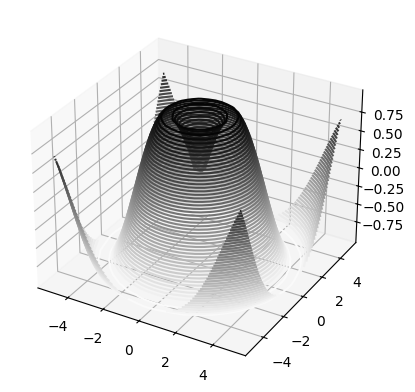

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

f = lambda x, y: np.sin(np.sqrt(x**2 + y**2))
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')


[Back to top](#term-portfolio-project)

____

## Answers to Selected Questions {-}

### Pt. 1 {-}

1. **Required**. Describe your continued learning experience in SENG 265. Make it a weekly habit to document your learning experience.
   - The entire document serves as a 'weekly learning experience' notebook - The weeks during which specific materials were covered are included in the [table of contentes](#table-of-contents).
2. What is the core functionality of Jupyter Notebooks?
   - [About notebooks, magics](#about-notebooks-magics)
3. Summarize simple Jupyter Notebook markdown including how to insert links and images?
   - Headings: `$`, `$$`, ...
   - Links/images: `[Name](link)`/`![Name](/path/to/image.jpg)`
4. How can you typeset mathematical formulas including Greek letters using LaTeX Markdown in Jupyter Notebooks? LaTeX is used extensively used for documents with mathematical formulas.  
   - Inline: `$x \sim \text{Binomial}(n, p)$` $\rightarrow x \sim \text{Binomial}(n, p)$
   - Display:
   `$$ |x| = \begin{cases} -x, \quad x < 0 \\ x, \quad x \geq 0 \end{cases} $$` $\rightarrow$
   $$
   |x| = \begin{cases}
   -x, \quad x < 0 \\
   x, \quad x \geq 0
   \end{cases}
   $$
5. How prevalent is Unix or Linux in software development today?
   - In short, Unix/Linux is like the C of operating systems: We wouldn't have the more popular options without it as it's their foundation. It's used extensively for servers and non-pc devices, albeit has quite a few users (myself included) who prefer it's functionality over less transparent OS's such as MacOS and Microsoft.
6.  What are the most popular programming languages and why?
   - Python comes first since it is by far the easiest language to write. Others include Java, JS/CSS and HTML, C and C++.
   - C is popular because it's about the closest you can get to writing assembly without having to write assembly - if you want a fast program that does exactly what you tell it to, C and C++ are the way to go. They also have extensive libraries which (once you know what they are) make writing code fairly easy
   - Java is popular because of it's portability, but as of late I don't see ths being a standout feature of java over any other programming language. It is also my least favorite to write.
7.  Describe the fundamental differences between C and Python.
   - The main difference is that C is a low-level language (pretty much a step up from assembly) and Python is pretty much the highest-level language.
8.  How challenging were learning C and completing Assignment 1 for you?
   - It was initially very challenging but once I figured out pointers and got into a 'groove' with chatGPT I found it easier to use than Java, granted I was not using the stack or dynamic memory.
9.  **Required**: What are your personal insights, aha moments, and epiphanies you experienced in the first part of the SENG 265 course?
   - The most significant insight I've had so far is how important it is to know how to *really* know bash. After I had written a couple simple scripts to automate lab server tasks I had a moment of awe at how powerful it could be - you can automate absolutely anything that a computer could do as long as you can figure out how to do it.
   - This is less of an epiphany, but still significant: After learning a bit of C for the first assignment, other languages are starting to make more sense, especially when it comes to pointers/pass-by-value/ref.
10. **Required**: How did you experience chatGPT as a learning tool?
   - [Introduction: Jupyter Magics](#introduction-jupyter-magics-creating-a-table-of-contents)
   - [A note on call-by-reference and call-by-value](#a-note-on-call-by-reference-and-call-by-value)
   - I've found chatGPT is extremely helpful for small, explicitly defined tasks. For example:
     - I had it write me a minimal .config file for conky, a system manager
     - I frequently have it write examples of code using specific functions to see how they're used in context
     - It usually gives a better response than google in far less time

[Back to top](#term-portfolio-project)

### Pt. 2 {-}

1. Describe the notion of and motivation for typing and typing hints in Python. The strongly typed programming language Rust is rapidly being adopted by companies and is used to improve the performance of Python. Why is Rust getting so popular? Does typing play a role?
   - [Python Type Annotations and Docstrings](#python-type-annotations-and-docstrings)


2. Describe the concepts of the Python logging module.
   - [The Logging Module](#the-logging-module)


16. **Required:** Summarize PEP 8 and be prepared to answer questions about PEP 8 in the final exam. 
    - [Style - Pep 8](#style---pep-8)

17. **Required:** Describe at least five of your favourite libraries in the Python ecosystem.
    - [Some Important Libraries](#some-important-libraries)

18. **Required:** Document your continued learning experience in SENG 265.
    - I hope that this document serves as a sufficient documentation. It has been updated with topics that were covered throughout the course that I did not already know or wanted to review.

19. **Required:** How did you experience Generative AI (e.g., chatGPT or Copilot) as a learning tool? This answer must be different from what you answered in TPP1 (i.e., the assumption is that you got to know chatGPT in the first part of the course and you really used it in the second part of the course).
    - Throughout the course I've gone from forgetting that chatGPT exists to going to it almost exclusively for help with almost any kind of problem solving. As I mentioned in my answer to pt.1, it's been far more helpful that google.
    - During the second portion of the course I think I still use it in a similar way, I just use it a lot more and for things that have nothing to do with code! For example where I started using it to solve small problems I was having when coding projects, I now ask it more general questions that I would normally ask google, i.e. for movie recommendations - the other day I even suggested my sister use it to find poetry for a paper she was writing. It turned this decent-sized task into one that took seconds.

20. **Required:** What are your personal insights, aha moments, and epiphanies you experienced in the second part of the SENG 265 course?
    - The biggest epiphany I've had (thus the addition of the large Python section to this file) has been that I had zero idea how to use python 'properly' (I probably still don't, it will take some practice). I think I took it for granted since when starting out you don't see any of the more useful features as those mentioned above: I was using it almost exclusively in a notebook which - while very helpful for quick code, note-taking and math help; doesn't do the language justice. It is quite a bit more straightforward than C in terms of making scripts/full-blown projects and while I still prefer coding smaller school projects in C (it feels a lot more 'straight-forward') I think that as I continue to improve my python skills it will end up as my go-to language.

[Back to top](#term-portfolio-project)

____

## Citations and References {-}

1. Custom commands for linux terminal, GeeksforGeeks (2018) https://www.geeksforgeeks.org/custom-commands-linux-terminal/
2. Where/how should I store scripts? Unix & Linux Stack Exchange (n.d.) https://unix.stackexchange.com/questions/604818/where-how-should-i-store-scripts
3. --help vs man command, Unix & Linux Stack Exchange (n.d.)https://unix.stackexchange.com/questions/86571/command-help-vs-man-command
4. Static vs Dynamic Typing, BairesDevBlog (n.d.) https://www.bairesdev.com/blog/static-vs-dynamic-typing/ 
5. PEP 8, Python Enhancement Proposals (2023) https://peps.python.org/pep-0008/
6. VsCodium (n.d.) https://vscodium.com/
7. Programming Recommendations, Python Enhancement Proposals (2023) https://peps.python.org/pep-0008/#programming-recommendations 
8. MATH248, University of Victoria Academic Calendar (2024) https://www.uvic.ca/calendar/future/undergrad/index.php#/courses/HyVe3daQV?bc=true&bcCurrent=MATH248%20-%20Computer%20Assisted%20Mathematics&bcGroup=Mathematics%20(MATH)&bcItemType=courses
9. HTML Tables, W3Schools (n.d.) https://www.w3schools.com/html/html_tables.asp
10. Report: Tesla Autopilot Involved in 736 Crashes since 2019, Sebastian Blanco (2023) https://www.caranddriver.com/news/a44185487/report-tesla-autopilot-crashes-since-2019/

[Back to top](#term-portfolio-project)

____